# Preprocessing and Modeling

Ear Images Reference:https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0232776

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import MobileNetV2, VGG16, InceptionV3, Xception, InceptionResNetV2, ResNet101
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

### DateFrame to Input Results From Models

In [2]:
results_df = pd.read_csv('../data/results_df.csv')

## Import Data 

In [29]:
train_gen = ImageDataGenerator(rescale = 1/255., validation_split= 0.4)

train_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training')

validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation')

Found 193 images belonging to 3 classes.
Found 127 images belonging to 3 classes.


In [52]:
#valid_gen = ImageDataGenerator(rescale = 1/255.)
#validation_data = train_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/valid/')

Found 71 images belonging to 3 classes.


In [30]:
test_gen = ImageDataGenerator(rescale = 1/255.)
test_data = test_gen.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/', shuffle = False)

Found 134 images belonging to 3 classes.


## Basic Model

In [61]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [62]:
history = model.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
10/10 [==============================] - 6s 517ms/step - loss: 95.2594 - accuracy: 0.3500 - recall: 0.3467 - precision: 0.3537 - val_loss: 85.7681 - val_accuracy: 0.2113 - val_recall: 0.2113 - val_precision: 0.2113
Epoch 2/80
10/10 [==============================] - 4s 412ms/step - loss: 49.9898 - accuracy: 0.3233 - recall: 0.3233 - precision: 0.3233 - val_loss: 13.7120 - val_accuracy: 0.2113 - val_recall: 0.2113 - val_precision: 0.2113
Epoch 3/80
10/10 [==============================] - 4s 415ms/step - loss: 12.0011 - accuracy: 0.4200 - recall: 0.4200 - precision: 0.4200 - val_loss: 9.4568 - val_accuracy: 0.5775 - val_recall: 0.5775 - val_precision: 0.5775
Epoch 4/80
10/10 [==============================] - 4s 413ms/step - loss: 5.5542 - accuracy: 0.5733 - recall: 0.5700 - precision: 0.5719 - val_loss: 4.4088 - val_accuracy: 0.4085 - val_recall: 0.4085 - val_precision: 0.4085
Epoch 5/80
10/10 [==============================] - 4s 425ms/step - loss: 2.3110 - accuracy: 0.6367

#### Adding Results to DF

In [232]:
results_df['train_accuracy'].iloc[0] = 1

In [233]:
results_df['val_accuracy'].iloc[0] = 0.7377

In [234]:
results_df['train_precision'].iloc[0] = 1

In [235]:
results_df['val_precision'].iloc[0] = 0.7377

In [236]:
results_df['train_recall'].iloc[0] = 1

In [237]:
results_df['val_recall'].iloc[0] = 0.7377

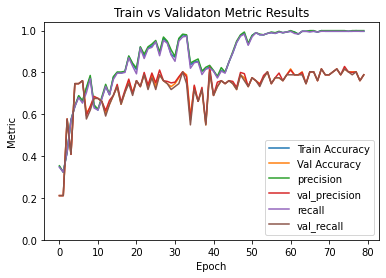

In [63]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.plot(history.history['val_precision'], label = 'val_precision')
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validaton Metric Results');

Very over fit. However, validation accuracy, precision and recall hovering in the 0.70

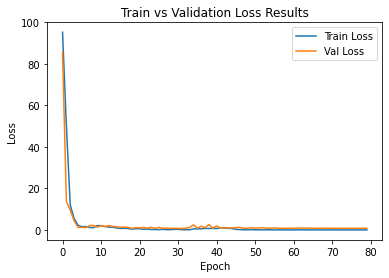

In [64]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [15]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [65]:
model.evaluate(test_data)

preds = model.predict(test_data) > 0.5

preds = preds.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds.argmax(axis=1))


4/4 [==============================] - 1s 227ms/step - loss: 4.4872 - accuracy: 0.4257 - recall: 0.4158 - precision: 0.4286


#### Adding Results to DF

In [238]:
results_df['test_recall'].iloc[0] = 0.4506

In [239]:
results_df['test_accuracy'].iloc[0] = 0.4506

In [240]:
results_df['test_precision'].iloc[0] =  0.4506

#### Confusion Matrix

In [66]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        11     1      34
tube             4    12       4
normal           8     6      21


#### Classification Report 

In [67]:
print(classification_report(test_data_values, preds.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.48      0.24      0.32        46
        tube       0.63      0.60      0.62        20
      normal       0.36      0.60      0.45        35

    accuracy                           0.44       101
   macro avg       0.49      0.48      0.46       101
weighted avg       0.47      0.44      0.42       101



## Model 1: Adding Epochs

In [22]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(3, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [23]:
history1 = model1.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 4s 502ms/step - loss: 61.9959 - accuracy: 0.3855 - recall: 0.3855 - precision: 0.3871 - val_loss: 16.7865 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/100
8/8 [==============================] - 3s 419ms/step - loss: 14.4406 - accuracy: 0.4538 - recall: 0.4498 - precision: 0.4534 - val_loss: 6.8996 - val_accuracy: 0.4590 - val_recall: 0.4590 - val_precision: 0.4590
Epoch 3/100
8/8 [==============================] - 3s 430ms/step - loss: 7.4332 - accuracy: 0.5984 - recall: 0.5984 - precision: 0.5984 - val_loss: 12.3662 - val_accuracy: 0.5574 - val_recall: 0.5574 - val_precision: 0.5574
Epoch 4/100
8/8 [==============================] - 3s 418ms/step - loss: 6.1898 - accuracy: 0.6426 - recall: 0.6426 - precision: 0.6426 - val_loss: 4.6399 - val_accuracy: 0.6230 - val_recall: 0.6230 - val_precision: 0.6230
Epoch 5/100
8/8 [==============================] - 3s 424ms/step - loss: 4.8392 - accuracy: 0.6867 - rec

#### Adding Results to DF

In [241]:
results_df['train_accuracy'].iloc[1] = 1

In [242]:
results_df['val_accuracy'].iloc[1] = 0.6721

In [243]:
results_df['train_recall'].iloc[1] = 1

In [244]:
results_df['val_recall'].iloc[1] = 0.6721

In [245]:
results_df['train_precision'].iloc[1] = 1

In [246]:
results_df['val_precision'].iloc[1] = 0.6721

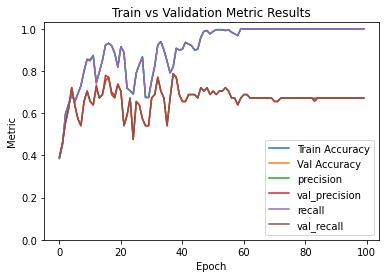

In [30]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history1.history['precision'], label = 'precision')
plt.plot(history1.history['val_precision'], label = 'val_precision')
plt.plot(history1.history['recall'], label = 'recall')
plt.plot(history1.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit. Validation accuracy, precision, and recall hovering in the 0.60

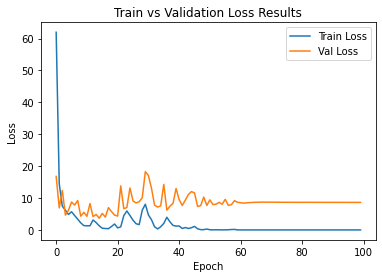

In [31]:
#plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [32]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [33]:
model1.evaluate(test_data)

preds1 = model1.predict(test_data) > 0.5

preds1 = preds1.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds1.argmax(axis=1))
cm

6/6 [==============================] - 2s 250ms/step - loss: 17.5811 - accuracy: 0.4568 - recall: 0.4568 - precision: 0.4568


array([[18, 13, 40],
       [ 1, 25,  5],
       [12, 17, 31]])

#### Adding Test Data to DF

In [247]:
results_df['test_accuracy'].iloc[1] = 0.4403 

In [248]:
results_df['test_recall'].iloc[1] = 0.4403 

In [249]:
results_df['test_precision'].iloc[1] = 0.4403 

#### Confusion Matrix

In [37]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        18    13      40
tube             1    25       5
normal          12    17      31


#### Classifcation Report 

In [38]:
print(classification_report(test_data_values, preds1.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.58      0.25      0.35        71
        tube       0.45      0.81      0.58        31
      normal       0.41      0.52      0.46        60

    accuracy                           0.46       162
   macro avg       0.48      0.53      0.46       162
weighted avg       0.49      0.46      0.43       162



## Model 2: Adding Layers 

In [39]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(50, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(3, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [40]:
history2 = model2.fit(train_data, epochs = 100, validation_data = validation_data,
    batch_size = 32)

Epoch 1/100
8/8 [==============================] - 5s 542ms/step - loss: 22.2899 - accuracy: 0.3976 - recall: 0.3494 - precision: 0.3867 - val_loss: 4.2875 - val_accuracy: 0.2295 - val_recall: 0.2295 - val_precision: 0.2295
Epoch 2/100
8/8 [==============================] - 3s 429ms/step - loss: 6.5347 - accuracy: 0.3655 - recall: 0.3655 - precision: 0.3655 - val_loss: 4.7971 - val_accuracy: 0.3607 - val_recall: 0.3607 - val_precision: 0.3667
Epoch 3/100
8/8 [==============================] - 3s 439ms/step - loss: 4.9408 - accuracy: 0.4056 - recall: 0.4056 - precision: 0.4056 - val_loss: 1.6396 - val_accuracy: 0.5246 - val_recall: 0.4918 - val_precision: 0.5263
Epoch 4/100
8/8 [==============================] - 3s 428ms/step - loss: 3.5122 - accuracy: 0.4659 - recall: 0.4498 - precision: 0.4609 - val_loss: 1.2259 - val_accuracy: 0.5738 - val_recall: 0.5574 - val_precision: 0.5763
Epoch 5/100
8/8 [==============================] - 3s 429ms/step - loss: 3.0653 - accuracy: 0.5020 - recall

#### Adding Results to DF

In [250]:
results_df['train_accuracy'].iloc[2] = 1

In [251]:
results_df['train_recall'].iloc[2] = 1

In [252]:
results_df['train_precision'].iloc[2] = 1

In [253]:
results_df['val_accuracy'].iloc[2] = 0.7541

In [254]:
results_df['val_recall'].iloc[2] = 0.7377

In [255]:
results_df['val_precision'].iloc[2] = 0.7500

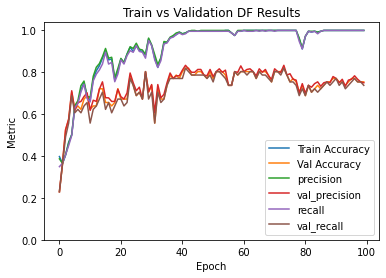

In [47]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history2.history['precision'], label = 'precision')
plt.plot(history2.history['val_precision'], label = 'val_precision')
plt.plot(history2.history['recall'], label = 'recall')
plt.plot(history2.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation DF Results');

Model still overfit. Validation accuracy, precision, and recall still hovering in the 70s

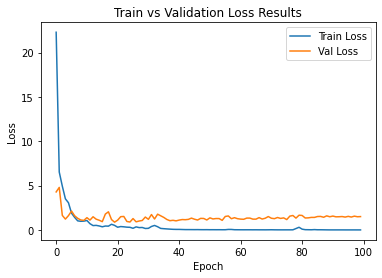

In [48]:
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [49]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [50]:
model2.evaluate(test_data)

preds2 = model2.predict(test_data) > 0.5

preds2 = preds2.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds2.argmax(axis=1))

6/6 [==============================] - 2s 251ms/step - loss: 3.7455 - accuracy: 0.4938 - recall: 0.4938 - precision: 0.5000


#### Adding Results to DF

In [256]:
results_df['test_accuracy'].iloc[2] =  0.4938

In [257]:
results_df['test_precision'].iloc[2] =  0.5000

In [258]:
results_df['test_recall'].iloc[2] =  0.4938

#### Confusion Matrix

In [54]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        18    13      40
tube             2    26       3
normal          18     6      36


#### Classification Report 

In [55]:
print(classification_report(test_data_values, preds2.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.47      0.25      0.33        71
        tube       0.58      0.84      0.68        31
      normal       0.46      0.60      0.52        60

    accuracy                           0.49       162
   macro avg       0.50      0.56      0.51       162
weighted avg       0.49      0.49      0.47       162



## Model 3: Changing Layers and Using Early Stopping 

In [34]:
early_stop = EarlyStopping(patience = 5)

In [57]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(100, activation = 'relu'))
model3.add(Dense(50, activation = 'relu'))
model3.add(Dense(3, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [58]:
history3 = model3.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
8/8 [==============================] - 4s 494ms/step - loss: 29.4248 - accuracy: 0.3976 - recall: 0.3695 - precision: 0.4126 - val_loss: 29.2453 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 425ms/step - loss: 28.0347 - accuracy: 0.3454 - recall: 0.3454 - precision: 0.3454 - val_loss: 30.0533 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 3/80
8/8 [==============================] - 3s 428ms/step - loss: 15.8783 - accuracy: 0.4418 - recall: 0.4418 - precision: 0.4418 - val_loss: 13.9424 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 4/80
8/8 [==============================] - 3s 426ms/step - loss: 11.1151 - accuracy: 0.4217 - recall: 0.4177 - precision: 0.4194 - val_loss: 8.1922 - val_accuracy: 0.3770 - val_recall: 0.3770 - val_precision: 0.3770
Epoch 5/80
8/8 [==============================] - 3s 434ms/step - loss: 6.8720 - accuracy: 0.4699 - recal

#### Adding Results to DF

In [259]:
results_df['train_accuracy'].iloc[3] = 0.9116

In [260]:
results_df['train_recall'].iloc[3] = 0.9116

In [261]:
results_df['train_precision'].iloc[3] = 0.9190

In [262]:
results_df['val_accuracy'].iloc[3] = 0.6393

In [263]:
results_df['val_recall'].iloc[3] = 0.6393

In [264]:
results_df['val_precision'].iloc[3] = 0.6842

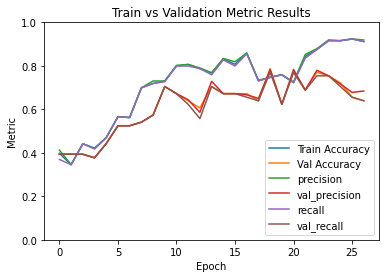

In [65]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history3.history['precision'], label = 'precision')
plt.plot(history3.history['val_precision'], label = 'val_precision')
plt.plot(history3.history['recall'], label = 'recall')
plt.plot(history3.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model not looking as overfit as previous models. Validation accuracy, precision and recall are still hovering in the 0.6s

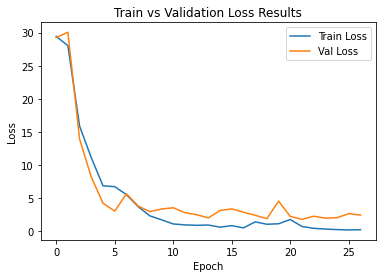

In [66]:
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [67]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [68]:
model3.evaluate(test_data)

preds3 = model3.predict(test_data) > 0.5

preds3 = preds3.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds3.argmax(axis=1))

6/6 [==============================] - 2s 253ms/step - loss: 4.4894 - accuracy: 0.4506 - recall: 0.4444 - precision: 0.4472


#### Adding Results to DF

In [265]:
results_df['test_precision'].iloc[3] =  0.4472

In [266]:
results_df['test_recall'].iloc[3] = 0.4444

In [267]:
results_df['test_accuracy'].iloc[3] = 0.4506

#### Confusion Matrix

In [72]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        17     7      47
tube             1    12      18
normal          11     5      44


#### Classification Report 

In [73]:
print(classification_report(test_data_values, preds3.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#precision:TP/(TP+FP)
#recall:TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.59      0.24      0.34        71
        tube       0.50      0.39      0.44        31
      normal       0.40      0.73      0.52        60

    accuracy                           0.45       162
   macro avg       0.50      0.45      0.43       162
weighted avg       0.50      0.45      0.43       162



## Model 4: Changing Layers and Dropout

In [74]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(50, activation = 'relu'))
model4.add(Dropout(0.1))
model4.add(Dense(3, activation = 'softmax'))

model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [75]:
history4 = model4.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 4s 489ms/step - loss: 25.5620 - accuracy: 0.3494 - recall: 0.3293 - precision: 0.3581 - val_loss: 10.0967 - val_accuracy: 0.5246 - val_recall: 0.5246 - val_precision: 0.5246
Epoch 2/80
8/8 [==============================] - 3s 428ms/step - loss: 16.7730 - accuracy: 0.4056 - recall: 0.4056 - precision: 0.4056 - val_loss: 11.7665 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 3/80
8/8 [==============================] - 3s 429ms/step - loss: 10.7519 - accuracy: 0.4458 - recall: 0.4458 - precision: 0.4476 - val_loss: 1.3439 - val_accuracy: 0.5902 - val_recall: 0.5738 - val_precision: 0.5833
Epoch 4/80
8/8 [==============================] - 3s 420ms/step - loss: 7.2430 - accuracy: 0.4900 - recall: 0.4900 - precision: 0.4900 - val_loss: 1.0806 - val_accuracy: 0.7213 - val_recall: 0.6885 - val_precision: 0.7241
Epoch 5/80
8/8 [==============================] - 3s 427ms/step - loss: 3.8974 - accuracy: 0.5984 - recall:

#### Adding Results to DF

In [268]:
results_df['train_accuracy'].iloc[4] = 0.8956 

In [269]:
results_df['train_recall'].iloc[4] = 0.8273

In [270]:
results_df['train_precision'].iloc[4] = 0.9626

In [271]:
results_df['val_accuracy'].iloc[4] =0.6885

In [272]:
results_df['val_recall'].iloc[4] = 0.6393

In [273]:
results_df['val_precision'].iloc[4] = 0.7358

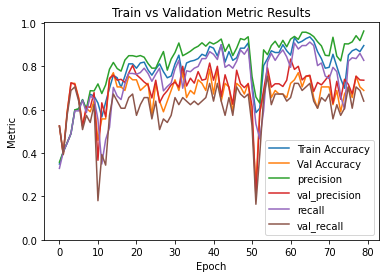

In [82]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history4.history['precision'], label = 'precision')
plt.plot(history4.history['val_precision'], label = 'val_precision')
plt.plot(history4.history['recall'], label = 'recall')
plt.plot(history4.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');



Model is still overfit. Validation recall, precision and accuracy are hovering in the 0.7s and 0.6s.

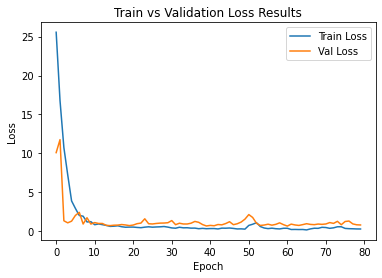

In [83]:
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [84]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [85]:
model4.evaluate(test_data)

preds4 = model4.predict(test_data) > 0.5

preds4 = preds4.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds4.argmax(axis=1))

6/6 [==============================] - 2s 257ms/step - loss: 1.7829 - accuracy: 0.4321 - recall: 0.4321 - precision: 0.4545


#### Adding Results to DF

In [274]:
results_df['test_accuracy'].iloc[4] = 0.4321

In [275]:
results_df['test_recall'].iloc[4] = 0.4321 

In [276]:
results_df['test_precision'].iloc[4] = 0.4545

#### Confusion Matrix 

In [89]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        25     0      46
tube             1    11      19
normal          16     3      41


#### Classification Report 

In [90]:
print(classification_report(test_data_values, preds4.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.60      0.35      0.44        71
        tube       0.79      0.35      0.49        31
      normal       0.39      0.68      0.49        60

    accuracy                           0.48       162
   macro avg       0.59      0.46      0.48       162
weighted avg       0.55      0.48      0.47       162



## Model 5: Kernal Regularizer with Dropout

In [91]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(100, activation = 'relu'))
model5.add(Dropout(0.1))
model5.add(Dense(50, activation = 'relu', kernel_regularizer = l2(0.1)))
model5.add(Dense(3, activation = 'softmax'))

model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [92]:
history5 = model5.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 4s 483ms/step - loss: 47.2091 - accuracy: 0.2651 - recall: 0.2410 - precision: 0.2691 - val_loss: 12.4537 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/80
8/8 [==============================] - 3s 427ms/step - loss: 26.5126 - accuracy: 0.4177 - recall: 0.4177 - precision: 0.4177 - val_loss: 8.5626 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 3/80
8/8 [==============================] - 3s 427ms/step - loss: 11.0128 - accuracy: 0.3454 - recall: 0.3454 - precision: 0.3482 - val_loss: 4.9395 - val_accuracy: 0.5738 - val_recall: 0.5738 - val_precision: 0.5738
Epoch 4/80
8/8 [==============================] - 3s 427ms/step - loss: 9.1130 - accuracy: 0.4659 - recall: 0.4618 - precision: 0.4656 - val_loss: 7.3582 - val_accuracy: 0.4754 - val_recall: 0.4754 - val_precision: 0.4754
Epoch 5/80
8/8 [==============================] - 3s 431ms/step - loss: 8.4282 - accuracy: 0.3775 - recall: 

#### Adding Results to DF

In [277]:
results_df['train_accuracy'].iloc[5] = 0.8153

In [278]:
results_df['train_recall'].iloc[5] = 0.7590

In [279]:
results_df['train_precision'].iloc[5] = 0.8710

In [280]:
results_df['val_accuracy'].iloc[5] = 0.7541

In [281]:
results_df['val_recall'].iloc[5] = 0.6393

In [282]:
results_df['val_precision'].iloc[5] = 0.7647

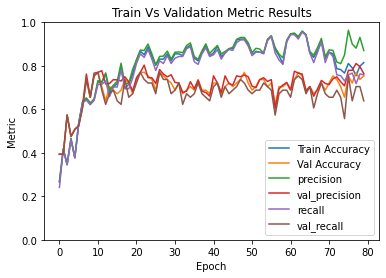

In [99]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history5.history['precision'], label = 'precision')
plt.plot(history5.history['val_precision'], label = 'val_precision')
plt.plot(history5.history['recall'], label = 'recall')
plt.plot(history5.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train Vs Validation Metric Results');

Model looking less overfit. However, validation accuracy, precision and recall are hovering around 0.6s and 0.7

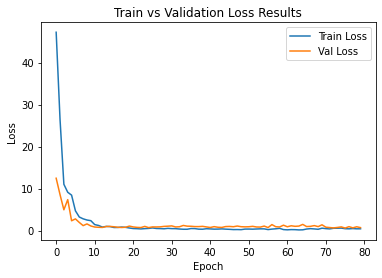

In [100]:
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [101]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [102]:
model5.evaluate(test_data)

preds5 = model5.predict(test_data) > 0.5

preds5 = preds5.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds5.argmax(axis=1))

6/6 [==============================] - 2s 284ms/step - loss: 1.3262 - accuracy: 0.4136 - recall: 0.3457 - precision: 0.4088


#### Adding Results to DF

In [283]:
results_df['test_accuracy'].iloc[5] = 0.4136

In [284]:
results_df['test_recall'].iloc[5] = 0.3457

In [285]:
results_df['test_precision'].iloc[5]  =  0.4088

#### Confusion Matrix

In [106]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        31     2      38
tube            16    10       5
normal          31     2      27


#### Classification Report 

In [107]:
print(classification_report(test_data_values, preds5.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.40      0.44      0.42        71
        tube       0.71      0.32      0.44        31
      normal       0.39      0.45      0.42        60

    accuracy                           0.42       162
   macro avg       0.50      0.40      0.43       162
weighted avg       0.45      0.42      0.42       162



## Model 6: Adding Convolutional Operation

In [108]:
model6 = Sequential()
model6.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model6.add(Flatten())
model6.add(Dense(100, activation = 'relu'))
model6.add(Dropout(0.1))
model6.add(Dense(50, activation = 'relu'))
model6.add(Dense(3, activation = 'softmax'))

model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])


In [109]:
history6 = model6.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 7s 757ms/step - loss: 12.8565 - accuracy: 0.3936 - recall: 0.3454 - precision: 0.3981 - val_loss: 5.2925 - val_accuracy: 0.2131 - val_recall: 0.2131 - val_precision: 0.2131
Epoch 2/80
8/8 [==============================] - 5s 626ms/step - loss: 3.0458 - accuracy: 0.5261 - recall: 0.4940 - precision: 0.5279 - val_loss: 0.8458 - val_accuracy: 0.5246 - val_recall: 0.4262 - val_precision: 0.7222
Epoch 3/80
8/8 [==============================] - 5s 674ms/step - loss: 0.7244 - accuracy: 0.7068 - recall: 0.4980 - precision: 0.8000 - val_loss: 0.8624 - val_accuracy: 0.6885 - val_recall: 0.4098 - val_precision: 0.7353
Epoch 4/80
8/8 [==============================] - 5s 670ms/step - loss: 0.4816 - accuracy: 0.8554 - recall: 0.7510 - precision: 0.8863 - val_loss: 0.5315 - val_accuracy: 0.7869 - val_recall: 0.7869 - val_precision: 0.8136
Epoch 5/80
8/8 [==============================] - 5s 639ms/step - loss: 0.2117 - accuracy: 0.9116 - recall: 0.8

#### Adding Results to DF

In [286]:
results_df['train_accuracy'].iloc[6] = 1

results_df['train_precision'].iloc[6] = 1

results_df['train_recall'].iloc[6] = 1

results_df['val_accuracy'].iloc[6] = 0.8033

results_df['val_precision'].iloc[6] =0.8033

results_df['val_recall'].iloc[6] = 0.8033

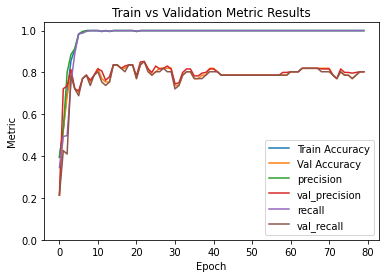

In [111]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history6.history['precision'], label = 'precision')
plt.plot(history6.history['val_precision'], label = 'val_precision')
plt.plot(history6.history['recall'], label = 'recall')
plt.plot(history6.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit but validation accuracy, precision and recall are increasing with values in the 0.8

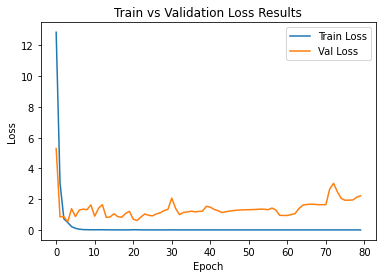

In [112]:
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [113]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [114]:
model6.evaluate(test_data)

preds6 = model6.predict(test_data) > 0.5

preds6 = preds6.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds6.argmax(axis=1))

6/6 [==============================] - 2s 297ms/step - loss: 3.2101 - accuracy: 0.5864 - recall: 0.5864 - precision: 0.5975


#### Adding Results to DF

In [287]:
results_df['test_accuracy'].iloc[6] = 0.5864

results_df['test_precision'].iloc[6] = 0.5975

results_df['test_recall'].iloc[6] = 0.5864

#### Confusion Matrix

In [116]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        29    11      31
tube             3    26       2
normal          14     5      41


#### Classification Report 

In [117]:
print(classification_report(test_data_values, preds6.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.63      0.41      0.50        71
        tube       0.62      0.84      0.71        31
      normal       0.55      0.68      0.61        60

    accuracy                           0.59       162
   macro avg       0.60      0.64      0.61       162
weighted avg       0.60      0.59      0.58       162



## Model 7: Convolutional Operation and Max Pooling

In [35]:
model7 = Sequential()
model7.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model7.add(MaxPool2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(100, activation = 'relu'))
model7.add(Dropout(0.1))
model7.add(Dense(3, activation = 'softmax'))

model7.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [36]:
history7 = model7.fit(train_data, epochs = 80, validation_data = validation_data,
    batch_size = 32, callbacks=[early_stop])

Epoch 1/80
7/7 [==============================] - 5s 655ms/step - loss: 12.1010 - accuracy: 0.3782 - recall: 0.3212 - precision: 0.3780 - val_loss: 5.3028 - val_accuracy: 0.3937 - val_recall: 0.3937 - val_precision: 0.3937
Epoch 2/80
7/7 [==============================] - 4s 564ms/step - loss: 3.4779 - accuracy: 0.3886 - recall: 0.3575 - precision: 0.3770 - val_loss: 2.9805 - val_accuracy: 0.4016 - val_recall: 0.4016 - val_precision: 0.4048
Epoch 3/80
7/7 [==============================] - 4s 638ms/step - loss: 4.9583 - accuracy: 0.4197 - recall: 0.4197 - precision: 0.4219 - val_loss: 2.1453 - val_accuracy: 0.4016 - val_recall: 0.4016 - val_precision: 0.4080
Epoch 4/80
7/7 [==============================] - 4s 577ms/step - loss: 1.6908 - accuracy: 0.4041 - recall: 0.3316 - precision: 0.4051 - val_loss: 1.4236 - val_accuracy: 0.5276 - val_recall: 0.3228 - val_precision: 0.4607
Epoch 5/80
7/7 [==============================] - 4s 577ms/step - loss: 1.0500 - accuracy: 0.6528 - recall: 0.3

#### Adding Results to DF

In [288]:
results_df['train_accuracy'].iloc[7] = 1

results_df['train_precision'].iloc[7] = 1

results_df['train_recall'].iloc[7] = 1

results_df['val_accuracy'].iloc[7] = 0.7869

results_df['val_precision'].iloc[7] = 0.7869

results_df['val_recall'].iloc[7] = 0.7869

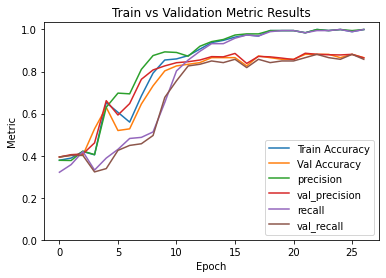

In [37]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history7.history['precision'], label = 'precision')
plt.plot(history7.history['val_precision'], label = 'val_precision')
plt.plot(history7.history['recall'], label = 'recall')
plt.plot(history7.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model still overfit but validation accuracy, precision and recall are increasing with values in high 0.7

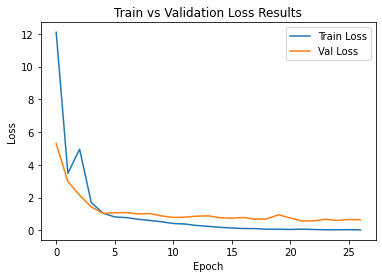

In [38]:
plt.plot(history7.history['loss'], label = 'Train Loss')
plt.plot(history7.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data 

In [123]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [39]:
model7.evaluate(test_data)

preds7 = model7.predict(test_data) > 0.5

preds7 = preds7.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds7.argmax(axis=1))

5/5 [==============================] - 1s 264ms/step - loss: 1.8293 - accuracy: 0.5448 - recall: 0.5373 - precision: 0.5496


#### Adding Results to DF

In [289]:
results_df['test_accuracy'].iloc[7] = 0.5556

results_df['test_precision'].iloc[7] = 0.5590

results_df['test_recall'].iloc[7] = 0.5556

#### Confusion Matrix

In [126]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Column is True Class 
#Row is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        26     9      36
tube             1    26       4
normal           9    12      39


#### Classification Report 

In [127]:
print(classification_report(test_data_values, preds7.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.72      0.37      0.49        71
        tube       0.55      0.84      0.67        31
      normal       0.49      0.65      0.56        60

    accuracy                           0.56       162
   macro avg       0.59      0.62      0.57       162
weighted avg       0.61      0.56      0.55       162



## Model 8: Adding Prebuilt Networks InceptionV3

In [40]:
train_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                  validation_split=0.4)

In [41]:
test_gen_aug = ImageDataGenerator(rescale = 1/255.,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True)

In [42]:
train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training' )

valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 193 images belonging to 3 classes.
Found 127 images belonging to 3 classes.


In [44]:
test_data_aug = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/', shuffle = False)

Found 134 images belonging to 3 classes.


In [132]:
conv_base = InceptionV3(include_top=False, input_shape = (150, 150, 3))

In [133]:
preds = conv_base.predict(train_aug)

In [134]:
preds_val = conv_base.predict(valid_aug)

In [135]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(100, activation = 'relu'))
model8.add(Dropout(0.1))
#model8.add(Dense(50, activation = 'relu'))
model8.add(Dense(3, activation = 'softmax'))

model8.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [136]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [137]:
history8 = model8.fit(preds, y_train_binarized, epochs = 30, validation_data = (preds_val, y_valid_binarized),
    batch_size = 32)

Epoch 1/30
8/8 [==============================] - 1s 66ms/step - loss: 20.0853 - accuracy: 0.3092 - recall: 0.3092 - precision: 0.3105 - val_loss: 11.6235 - val_accuracy: 0.3934 - val_recall: 0.3934 - val_precision: 0.3934
Epoch 2/30
8/8 [==============================] - 0s 34ms/step - loss: 8.3947 - accuracy: 0.5221 - recall: 0.5221 - precision: 0.5221 - val_loss: 3.6345 - val_accuracy: 0.4262 - val_recall: 0.4262 - val_precision: 0.4333
Epoch 3/30
8/8 [==============================] - 0s 34ms/step - loss: 1.5726 - accuracy: 0.5703 - recall: 0.5582 - precision: 0.5720 - val_loss: 2.1347 - val_accuracy: 0.3115 - val_recall: 0.2951 - val_precision: 0.3051
Epoch 4/30
8/8 [==============================] - 0s 34ms/step - loss: 0.7120 - accuracy: 0.5301 - recall: 0.4538 - precision: 0.6766 - val_loss: 1.1616 - val_accuracy: 0.3934 - val_recall: 0.2623 - val_precision: 0.4103
Epoch 5/30
8/8 [==============================] - 0s 36ms/step - loss: 0.6654 - accuracy: 0.6747 - recall: 0.4940 

#### Adding Results to DF

In [290]:
results_df['train_accuracy'].iloc[8] = 0.9880

results_df['train_recall'].iloc[8] = 0.9880

results_df['train_precision'].iloc[8] = 0.9880

results_df['val_accuracy'].iloc[8] = 0.4590

results_df['val_recall'].iloc[8] =  0.4590

results_df['val_precision'].iloc[8] = 0.4590 


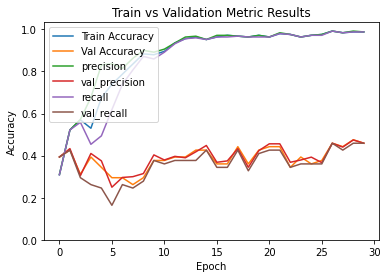

In [139]:
plt.plot(history8.history['accuracy'], label='Train Accuracy')
plt.plot(history8.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history8.history['precision'], label = 'precision')
plt.plot(history8.history['val_precision'], label = 'val_precision')
plt.plot(history8.history['recall'], label = 'recall')
plt.plot(history8.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped around 0.4. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

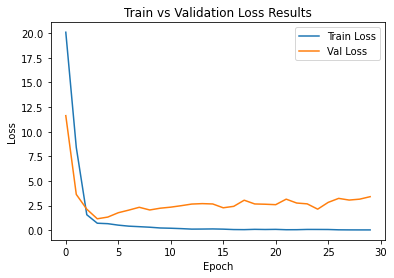

In [140]:
plt.plot(history8.history['loss'], label = 'Train Loss')
plt.plot(history8.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [141]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [142]:
test_preds = conv_base.predict(test_data_aug)

In [143]:
model8.evaluate(test_preds)

preds8 = model8.predict(test_preds) > 0.5

preds8 = preds8.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds8.argmax(axis=1))

6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [291]:
results_df['test_accuracy'].iloc[8] = 0

results_df['test_recall'].iloc[8] = 0

results_df['test_precision'].iloc[8] = 0

#### Confusion Matrix

In [145]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


          effusion  tube  normal
effusion        14     8      49
tube             3     7      21
normal          14    11      35


#### Classification Matrix 

In [146]:
print(classification_report(test_data_values, preds8.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.45      0.20      0.27        71
        tube       0.27      0.23      0.25        31
      normal       0.33      0.58      0.42        60

    accuracy                           0.35       162
   macro avg       0.35      0.34      0.31       162
weighted avg       0.37      0.35      0.32       162



## Model 9: Adding Prebuilt Networks Xception

In [147]:
conv_base9 = Xception(include_top=False, input_shape = (150, 150, 3))

In [148]:
preds9 = conv_base9.predict(train_aug)

In [149]:
preds_val9 = conv_base9.predict(valid_aug)

In [150]:
model9 = Sequential()
model9.add(GlobalAveragePooling2D())
model9.add(Dense(100, activation = 'relu'))
model9.add(Dropout(0.1))
model9.add(Dense(50, activation = 'relu'))
model9.add(Dense(3, activation = 'softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [151]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [152]:
history9 = model9.fit(preds9, y_train_binarized, epochs = 30, validation_data = (preds_val9, y_valid_binarized),
    batch_size = 32)

Epoch 1/30
8/8 [==============================] - 1s 53ms/step - loss: 1.1171 - accuracy: 0.3855 - recall: 0.1526 - precision: 0.3762 - val_loss: 1.0630 - val_accuracy: 0.3115 - val_recall: 0.0328 - val_precision: 0.6667
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 1.0331 - accuracy: 0.4458 - recall: 0.1446 - precision: 0.6429 - val_loss: 1.0653 - val_accuracy: 0.3770 - val_recall: 0.0164 - val_precision: 0.5000
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.9634 - accuracy: 0.5100 - recall: 0.1566 - precision: 0.7647 - val_loss: 1.0576 - val_accuracy: 0.3443 - val_recall: 0.0656 - val_precision: 0.3077
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.8907 - accuracy: 0.6064 - recall: 0.3695 - precision: 0.6970 - val_loss: 1.0572 - val_accuracy: 0.3770 - val_recall: 0.0820 - val_precision: 0.2941
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 0.8328 - accuracy: 0.6345 - recall: 0.4257 - 

#### Adding Results to DF

In [292]:
results_df['train_accuracy'].iloc[9] = 1

results_df['train_recall'].iloc[9] =  1

results_df['train_precision'].iloc[9] =  1

results_df['val_accuracy'].iloc[9] = 0.4262 

results_df['val_recall'].iloc[9] = 0.4098

results_df['val_precision'].iloc[9] = 0.4464  

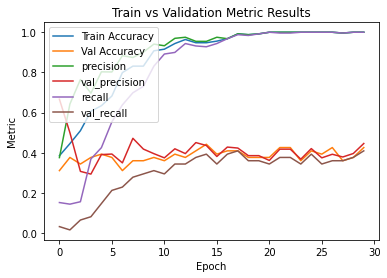

In [154]:
plt.plot(history9.history['accuracy'], label='Train Accuracy')
plt.plot(history9.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history9.history['precision'], label = 'precision')
plt.plot(history9.history['val_precision'], label = 'val_precision')
plt.plot(history9.history['recall'], label = 'recall')
plt.plot(history9.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped aronnd 0.4. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

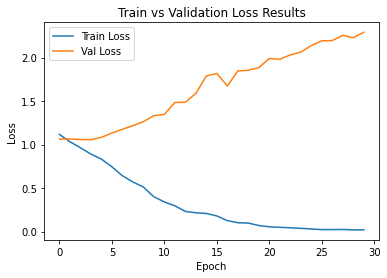

In [155]:
plt.plot(history9.history['loss'], label = 'Train Loss')
plt.plot(history9.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [156]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [157]:
preds9_test = conv_base9.predict(test_data_aug)
model9.evaluate(preds9_test)

preds9 = model9.predict(preds9_test) > 0.5

preds9 = preds9.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds9.argmax(axis=1))

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Results to DF

In [293]:

results_df['test_accuracy'].iloc[9] = 0

results_df['test_recall'].iloc[9] = 0

results_df['test_precision'].iloc[9] = 0


#### Confusion Matrix

In [159]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        30     8      33
tube            25     0       6
normal          40     7      13


#### Classification Report

In [160]:
print(classification_report(test_data_values, preds9.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.32      0.42      0.36        71
        tube       0.00      0.00      0.00        31
      normal       0.25      0.22      0.23        60

    accuracy                           0.27       162
   macro avg       0.19      0.21      0.20       162
weighted avg       0.23      0.27      0.24       162



## Model 10: Adding Prebuilt Networks VGG16

In [161]:
conv_base10 = VGG16(include_top=False, input_shape = (150, 150, 3))

In [162]:
preds10 = conv_base10.predict(train_aug)

In [163]:
preds_val10 = conv_base10.predict(valid_aug)

In [164]:
model10 = Sequential()
model10.add(GlobalAveragePooling2D())
model10.add(Dense(100, activation = 'relu'))
model10.add(Dropout(0.1))
model10.add(Dense(50, activation = 'relu'))
model10.add(Dense(3, activation = 'softmax'))

model10.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [165]:
y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

In [166]:
history10 = model10.fit(preds10, y_train_binarized, epochs = 100, validation_data = (preds_val10, y_valid_binarized),
    batch_size = 30)

Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 1.0913 - accuracy: 0.4137 - recall: 0.0683 - precision: 0.4250 - val_loss: 1.0669 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0607 - accuracy: 0.3896 - recall: 0.0643 - precision: 0.5333 - val_loss: 1.0684 - val_accuracy: 0.4098 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0769 - accuracy: 0.4056 - recall: 0.0080 - precision: 0.2222 - val_loss: 1.0692 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0827 - accuracy: 0.3855 - recall: 0.0040 - precision: 0.3333 - val_loss: 1.0653 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 1.0520 - acc

#### Adding Results to DF

In [294]:
results_df['train_accuracy'].iloc[10] = 0.8514 

results_df['train_recall'].iloc[10] = 0.8032

results_df['train_precision'].iloc[10] = 0.8772

results_df['val_accuracy'].iloc[10] = 0.4262 

results_df['val_recall'].iloc[10] = 0.4098

results_df['val_precision'].iloc[10] = 0.4386


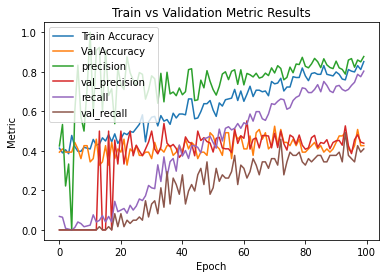

In [168]:
plt.plot(history10.history['accuracy'], label='Train Accuracy')
plt.plot(history10.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history10.history['precision'], label = 'precision')
plt.plot(history10.history['val_precision'], label = 'val_precision')
plt.plot(history10.history['recall'], label = 'recall')
plt.plot(history10.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit to training data. Validation accuracy, precision and recall scores have dropped aronnd 0.4. This might be from the pretrained neural network not being trained on images that are similiar to ear images.

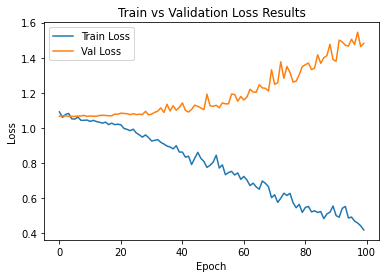

In [169]:
plt.plot(history10.history['loss'], label = 'Train Loss')
plt.plot(history10.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [170]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [171]:
preds10_test = conv_base10.predict(test_data_aug)

In [172]:
model10.evaluate(preds10_test)

preds10 = model10.predict(preds10_test) > 0.5

preds10 = preds10.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds10.argmax(axis=1))

6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [295]:
results_df['test_accuracy'].iloc[10] = 0 

results_df['test_recall'].iloc[10] = 0

results_df['test_precision'].iloc[10] = 0


#### Confusion Matrix 

In [174]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        40     8      23
tube            22     1       8
normal          42     1      17


#### Classification Report 

In [175]:
print(classification_report(test_data_values, preds10.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.38      0.56      0.46        71
        tube       0.10      0.03      0.05        31
      normal       0.35      0.28      0.31        60

    accuracy                           0.36       162
   macro avg       0.28      0.29      0.27       162
weighted avg       0.32      0.36      0.33       162



## Model 11: Adding Prebuilt Networks MobileNetV2

In [176]:
conv_base11 = MobileNetV2(include_top=False, input_shape = (150, 150, 3))

preds11 = conv_base11.predict(train_aug)

preds_val11 = conv_base11.predict(valid_aug)

model11 = Sequential()
model11.add(GlobalAveragePooling2D())
model11.add(Dense(100, activation = 'relu'))
model11.add(Dropout(0.1))
model11.add(Dense(50, activation = 'relu'))
model11.add(Dense(3, activation = 'softmax'))

model11.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

y_train = train_aug.labels 
y_train_binarized = to_categorical(y_train)

y_valid = valid_aug.labels 
y_valid_binarized = to_categorical(y_valid)

history11 = model11.fit(preds11, y_train_binarized, epochs = 100, validation_data = (preds_val11, y_valid_binarized),
    batch_size = 30)



Epoch 1/100
9/9 [==============================] - 1s 39ms/step - loss: 1.1165 - accuracy: 0.4177 - recall: 0.2129 - precision: 0.4380 - val_loss: 1.1555 - val_accuracy: 0.3770 - val_recall: 0.1311 - val_precision: 0.3636
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0747 - accuracy: 0.4458 - recall: 0.1165 - precision: 0.3816 - val_loss: 1.0404 - val_accuracy: 0.4754 - val_recall: 0.0984 - val_precision: 0.7500
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9493 - accuracy: 0.5622 - recall: 0.2369 - precision: 0.7284 - val_loss: 1.0750 - val_accuracy: 0.4754 - val_recall: 0.2131 - val_precision: 0.5652
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.9136 - accuracy: 0.5863 - recall: 0.3173 - precision: 0.6930 - val_loss: 1.0597 - val_accuracy: 0.5410 - val_recall: 0.1311 - val_precision: 0.5333
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 0.8488 - accuracy: 0.6466 - recall: 0.4578 -

#### Adding Results to DF

In [296]:
results_df['train_accuracy'].iloc[11] = 1

results_df['train_recall'].iloc[11] = 1

results_df['train_precision'].iloc[11] = 1

results_df['val_accuracy'].iloc[11] = 0.4590

results_df['val_recall'].iloc[11] = 0.4590

results_df['val_precision'].iloc[11] =  0.4667

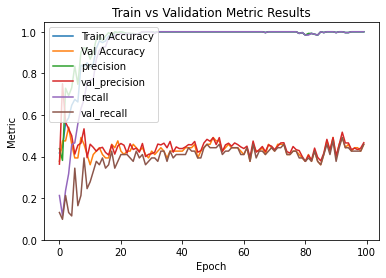

In [178]:
plt.plot(history11.history['accuracy'], label='Train Accuracy')
plt.plot(history11.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history11.history['precision'], label = 'precision')
plt.plot(history11.history['val_precision'], label = 'val_precision')
plt.plot(history11.history['recall'], label = 'recall')
plt.plot(history11.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model very overfit. Likely from pretrained network not being trained on ear images 

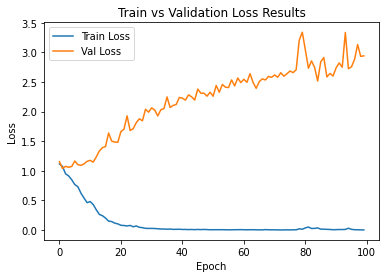

In [179]:
plt.plot(history11.history['loss'], label = 'Train Loss')
plt.plot(history11.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [180]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [181]:
preds11_test = conv_base11.predict(test_data_aug)

In [182]:
model11.evaluate(preds11_test)

preds11 = model11.predict(preds11_test) > 0.5

preds11 = preds11.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds11.argmax(axis=1))

6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - recall: 0.0000e+00 - precision: 0.0000e+00


#### Adding Result to DF

In [297]:
results_df['test_accuracy'].iloc[11] = 0

results_df['test_recall'].iloc[11] = 0

results_df['test_precision'].iloc[11] = 0

#### Confusion Matrix

In [184]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        40     5      26
tube            20     2       9
normal          15     7      38


#### Classification Report 

In [185]:
print(classification_report(test_data_values, preds11.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.53      0.56      0.55        71
        tube       0.14      0.06      0.09        31
      normal       0.52      0.63      0.57        60

    accuracy                           0.49       162
   macro avg       0.40      0.42      0.40       162
weighted avg       0.45      0.49      0.47       162



## Model 12: Experimenting with Convolutional Layers and Pooling (Adding Augmented Images)

In [46]:
model12 = Sequential()
model12.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model12.add(MaxPool2D((2, 2)))
model12.add(Flatten())
model12.add(Dense(100, activation = 'relu'))
model12.add(Dropout(0.1))
model12.add(Dense(3, activation = 'softmax'))

model12.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [47]:
history12 = model12.fit(train_aug, epochs = 80, validation_data = valid_aug)

Epoch 1/80
7/7 [==============================] - 9s 1s/step - loss: 5.4408 - accuracy: 0.3212 - recall: 0.2694 - precision: 0.3333 - val_loss: 2.7839 - val_accuracy: 0.4016 - val_recall: 0.3937 - val_precision: 0.4000
Epoch 2/80
7/7 [==============================] - 7s 1s/step - loss: 2.9874 - accuracy: 0.4145 - recall: 0.4093 - precision: 0.4158 - val_loss: 0.7756 - val_accuracy: 0.7480 - val_recall: 0.6063 - val_precision: 0.8021
Epoch 3/80
7/7 [==============================] - 7s 1s/step - loss: 2.2562 - accuracy: 0.3731 - recall: 0.3420 - precision: 0.3860 - val_loss: 0.8660 - val_accuracy: 0.6929 - val_recall: 0.6614 - val_precision: 0.7241
Epoch 4/80
7/7 [==============================] - 8s 1s/step - loss: 1.7882 - accuracy: 0.5492 - recall: 0.5130 - precision: 0.5440 - val_loss: 1.6453 - val_accuracy: 0.5984 - val_recall: 0.5984 - val_precision: 0.5984
Epoch 5/80
7/7 [==============================] - 8s 1s/step - loss: 1.3831 - accuracy: 0.5181 - recall: 0.5026 - precision:

#### Adding Result to DF

In [298]:
results_df['train_accuracy'].iloc[12] = 0.9438

results_df['train_recall'].iloc[12] = 0.9398 

results_df['train_precision'].iloc[12] = 0.9435

results_df['val_accuracy'].iloc[12] = 0.8361

results_df['val_recall'].iloc[12] = 0.8361

results_df['val_precision'].iloc[12] =  0.8361

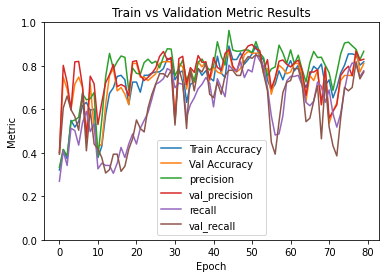

In [48]:
plt.plot(history12.history['accuracy'], label='Train Accuracy')
plt.plot(history12.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history12.history['precision'], label = 'precision')
plt.plot(history12.history['val_precision'], label = 'val_precision')
plt.plot(history12.history['recall'], label = 'recall')
plt.plot(history12.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model improving, slightly less overfit and validation recall, precision, and accuracy in 0.8s

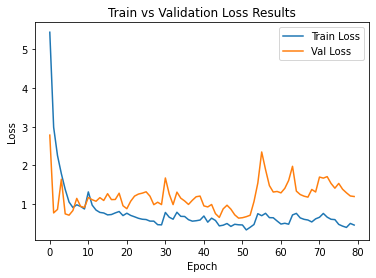

In [49]:
plt.plot(history12.history['loss'], label = 'Train Loss')
plt.plot(history12.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [191]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [50]:
model12.evaluate(test_data_aug)

preds12 = model12.predict(test_data_aug) > 0.5

preds12 = preds12.astype(int)

test_data_values = test_data.labels 


5/5 [==============================] - 3s 513ms/step - loss: 1.2012 - accuracy: 0.6269 - recall: 0.5746 - precision: 0.6525


#### Adding Results to DF

In [299]:
results_df['test_accuracy'].iloc[12] = 0.6667

results_df['test_recall'].iloc[12] = 0.6420

results_df['test_precision'].iloc[12] = 0.6753


#### Confusion Matrix

In [51]:
cm = confusion_matrix(test_data_values, preds12.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        36     7      10
tube             8    19       1
normal          18     0      35


#### Classification Report 

In [195]:
print(classification_report(test_data_values, preds12.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.76      0.52      0.62        71
        tube       0.51      0.68      0.58        31
      normal       0.65      0.78      0.71        60

    accuracy                           0.65       162
   macro avg       0.64      0.66      0.64       162
weighted avg       0.67      0.65      0.65       162



## Model 13: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Average Pool)

In [196]:
model13 = Sequential()
model13.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model13.add(AveragePooling2D((2, 2)))
model13.add(Flatten())
model13.add(Dense(100, activation = 'relu'))
model13.add(Dropout(0.1))
model13.add(Dense(3, activation = 'softmax'))

model13.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [197]:
history13 = model13.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 9s 1s/step - loss: 17.4637 - accuracy: 0.3976 - recall: 0.3815 - precision: 0.4008 - val_loss: 1.5130 - val_accuracy: 0.4098 - val_recall: 0.3115 - val_precision: 0.3958
Epoch 2/80
8/8 [==============================] - 8s 962ms/step - loss: 5.9710 - accuracy: 0.3976 - recall: 0.3976 - precision: 0.4008 - val_loss: 0.9423 - val_accuracy: 0.6393 - val_recall: 0.5574 - val_precision: 0.6800
Epoch 3/80
8/8 [==============================] - 8s 952ms/step - loss: 3.5373 - accuracy: 0.4819 - recall: 0.4779 - precision: 0.4857 - val_loss: 1.5251 - val_accuracy: 0.5082 - val_recall: 0.5082 - val_precision: 0.5345
Epoch 4/80
8/8 [==============================] - 8s 1s/step - loss: 2.2486 - accuracy: 0.5301 - recall: 0.5221 - precision: 0.5328 - val_loss: 1.0558 - val_accuracy: 0.5246 - val_recall: 0.5082 - val_precision: 0.5741
Epoch 5/80
8/8 [==============================] - 8s 1s/step - loss: 1.3783 - accuracy: 0.5502 - recall: 0.5181 - pre

#### Adding Results to DF

In [300]:
results_df['train_accuracy'].iloc[13] = 0.9076

results_df['train_recall'].iloc[13] =0.8795

results_df['train_precision'].iloc[13] = 0.9163

results_df['val_accuracy'].iloc[13] = 0.7705

results_df['val_recall'].iloc[13] =0.7541

results_df['val_precision'].iloc[13] =  0.7797

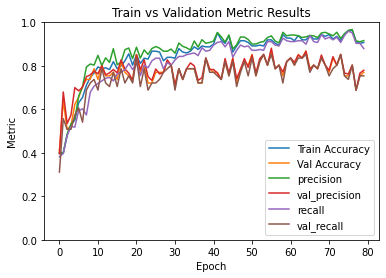

In [199]:
plt.plot(history13.history['accuracy'], label='Train Accuracy')
plt.plot(history13.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history13.history['precision'], label = 'precision')
plt.plot(history13.history['val_precision'], label = 'val_precision')
plt.plot(history13.history['recall'], label = 'recall')
plt.plot(history13.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');


Model still showing that it is overfit. Validation accuracy, precision and recall in upper .7s.

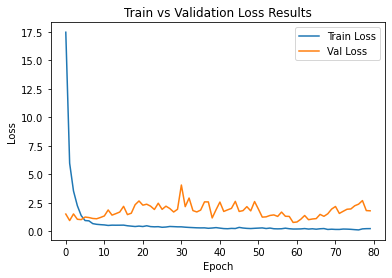

In [200]:
plt.plot(history13.history['loss'], label = 'Train Loss')
plt.plot(history13.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [201]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [202]:
model13.evaluate(test_data_aug)

preds13 = model13.predict(test_data_aug) > 0.5

preds13 = preds13.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds13.argmax(axis=1))

6/6 [==============================] - 4s 588ms/step - loss: 1.5597 - accuracy: 0.5988 - recall: 0.5741 - precision: 0.6078


#### Adding Results to DF

In [301]:
results_df['test_accuracy'].iloc[13] =0.5988

results_df['test_recall'].iloc[13] = 0.5741 

results_df['test_precision'].iloc[13] = 0.6078 


#### Confusion Matrix 

In [204]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        32    23      16
tube             4    18       9
normal          11     9      40


#### Classification Report 

In [205]:
print(classification_report(test_data_values, preds13.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.68      0.45      0.54        71
        tube       0.36      0.58      0.44        31
      normal       0.62      0.67      0.64        60

    accuracy                           0.56       162
   macro avg       0.55      0.57      0.54       162
weighted avg       0.60      0.56      0.56       162



## Model 14: Experimenting with Convolutional Layers, Augmented Images, and Pooling (Adding Global Average Pool)

In [52]:
model14 = Sequential()
model14.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model14.add(GlobalAveragePooling2D())
model14.add(Dense(100, activation = 'relu'))
model14.add(Dropout(0.1))
model14.add(Dense(3, activation = 'softmax'))

model14.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [54]:
history14 = model14.fit(train_aug, epochs = 100, validation_data = valid_aug,
    batch_size = 32, callbacks = [early_stop])

Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 1.0927 - accuracy: 0.3420 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0878 - val_accuracy: 0.3937 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 7s 1s/step - loss: 1.0839 - accuracy: 0.3731 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0825 - val_accuracy: 0.3937 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 7s 1s/step - loss: 1.0732 - accuracy: 0.4301 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0785 - val_accuracy: 0.3937 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 7s 1s/step - loss: 1.0663 - accuracy: 0.4560 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0747 - val_accuracy: 0.3937 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 7s 1s

#### Adding Results to DF

In [302]:
results_df['train_accuracy'].iloc[14] =  0.7470

results_df['train_recall'].iloc[14] = 0.6586

results_df['train_precision'].iloc[14] = 0.7847

results_df['val_accuracy'].iloc[14] = 0.6885

results_df['val_recall'].iloc[14] = 0.5738

results_df['val_precision'].iloc[14] =  0.7143


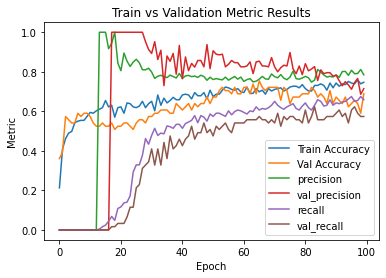

In [209]:
plt.plot(history14.history['accuracy'], label='Train Accuracy')
plt.plot(history14.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history14.history['precision'], label = 'precision')
plt.plot(history14.history['val_precision'], label = 'val_precision')
plt.plot(history14.history['recall'], label = 'recall')
plt.plot(history14.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model not looking overfit but lower training and valid accuracy, recall, and precision than previous models 

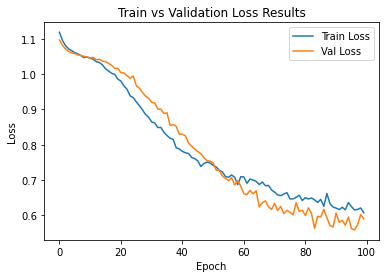

In [210]:
plt.plot(history14.history['loss'], label = 'Train Loss')
plt.plot(history14.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [211]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [212]:
model14.evaluate(test_data_aug)

preds14 = model14.predict(test_data_aug) > 0.5

preds14 = preds14.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds14.argmax(axis=1))

6/6 [==============================] - 4s 573ms/step - loss: 0.9370 - accuracy: 0.5370 - recall: 0.4877 - precision: 0.6529


#### Adding Results to DF

In [303]:
results_df['test_accuracy'].iloc[14] = 0.5370

results_df['test_recall'].iloc[14] = 0.4877 

results_df['test_precision'].iloc[14] = 0.6529


#### Confusion Matrix

In [214]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match


          effusion  tube  normal
effusion        52     4      15
tube            14     2      15
normal          10     2      48


#### Classification Report 

In [215]:
print(classification_report(test_data_values, preds14.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.68      0.73      0.71        71
        tube       0.25      0.06      0.10        31
      normal       0.62      0.80      0.70        60

    accuracy                           0.63       162
   macro avg       0.52      0.53      0.50       162
weighted avg       0.58      0.63      0.59       162



## Model 15: Experimenting with Convolutional Layers, Augmented Data and Pooling (Adding Global Max Pool)

In [216]:
model15 = Sequential()
model15.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model15.add(GlobalMaxPooling2D())
model15.add(Dense(100, activation = 'relu'))
model15.add(Dropout(0.1))
model15.add(Dense(3, activation = 'softmax'))

model15.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [217]:
history15 = model15.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
8/8 [==============================] - 9s 1s/step - loss: 1.0790 - accuracy: 0.3896 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0619 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/80
8/8 [==============================] - 8s 988ms/step - loss: 1.0605 - accuracy: 0.3695 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0551 - val_accuracy: 0.4098 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/80
8/8 [==============================] - 8s 969ms/step - loss: 1.0611 - accuracy: 0.4337 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0526 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/80
8/8 [==============================] - 8s 952ms/step - loss: 1.0606 - accuracy: 0.3855 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0507 - val_accuracy: 0.3934 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/80
8/8 [==============================] - 8

#### Adding Result to DF

In [304]:
results_df['train_accuracy'].iloc[15] = 0.7149

results_df['train_recall'].iloc[15] = 0.6747 

results_df['train_precision'].iloc[15] = 0.7706

results_df['val_accuracy'].iloc[15] =  0.7049

results_df['val_recall'].iloc[15] = 0.5902

results_df['val_precision'].iloc[15] =  0.7660

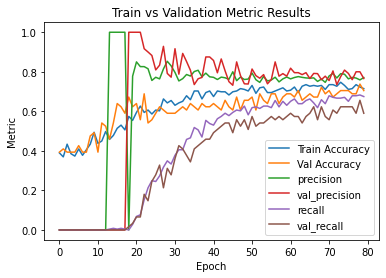

In [219]:
plt.plot(history15.history['accuracy'], label='Train Accuracy')
plt.plot(history15.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history15.history['precision'], label = 'precision')
plt.plot(history15.history['val_precision'], label = 'val_precision')
plt.plot(history15.history['recall'], label = 'recall')
plt.plot(history15.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Model not looking overfit but lower training and valid accuracy, recall, and precision than previous models 

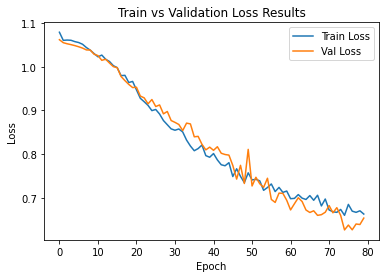

In [220]:
plt.plot(history15.history['loss'], label = 'Train Loss')
plt.plot(history15.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss Results');

### Test Data

In [221]:
# reference: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

In [222]:
model15.evaluate(test_data_aug)

preds15 = model15.predict(test_data_aug) > 0.5

preds15 = preds15.astype(int)

test_data_values = test_data.labels 

cm = confusion_matrix(test_data_values, preds15.argmax(axis=1))

6/6 [==============================] - 3s 520ms/step - loss: 1.0162 - accuracy: 0.6296 - recall: 0.5926 - precision: 0.6531


#### Adding Results to DF

In [305]:
results_df['test_accuracy'].iloc[15] = 0.6296

results_df['test_recall'].iloc[15] = 0.5926

results_df['test_precision'].iloc[15] = 0.6531


#### Confusion Matrix

In [224]:
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        36    17      18
tube             8    17       6
normal           6     9      45


#### Classification Report 

In [225]:
print(classification_report(test_data_values, preds15.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN).

              precision    recall  f1-score   support

    effusion       0.72      0.51      0.60        71
        tube       0.40      0.55      0.46        31
      normal       0.65      0.75      0.70        60

    accuracy                           0.60       162
   macro avg       0.59      0.60      0.58       162
weighted avg       0.63      0.60      0.61       162



## Model 16: Maxpool,Conv2D, with Less Neurons

In [55]:
model16 = Sequential()
model16.add(Conv2D(filters = 10, kernel_size = (3, 3), activation = 'relu'))
model16.add(MaxPool2D((2, 2)))
model16.add(Flatten())
model16.add(Dense(50, activation = 'relu'))
model16.add(Dropout(0.1))
model16.add(Dense(3, activation = 'softmax'))

model16.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'Recall', 'Precision'])

In [ ]:
history16 = model16.fit(train_aug, epochs = 80, validation_data = valid_aug,
    batch_size = 32)

Epoch 1/80
7/7 [==============================] - 8s 1s/step - loss: 7.6261 - accuracy: 0.3472 - recall: 0.3005 - precision: 0.3602 - val_loss: 2.4456 - val_accuracy: 0.5591 - val_recall: 0.5512 - val_precision: 0.5600
Epoch 2/80
7/7 [==============================] - 7s 1s/step - loss: 2.5358 - accuracy: 0.3679 - recall: 0.3472 - precision: 0.3602 - val_loss: 0.7937 - val_accuracy: 0.7087 - val_recall: 0.6850 - val_precision: 0.7131
Epoch 3/80
7/7 [==============================] - 7s 1s/step - loss: 1.5157 - accuracy: 0.5959 - recall: 0.5855 - precision: 0.6043 - val_loss: 0.7769 - val_accuracy: 0.6929 - val_recall: 0.6535 - val_precision: 0.7155
Epoch 4/80
7/7 [==============================] - 7s 1s/step - loss: 1.0025 - accuracy: 0.6321 - recall: 0.5907 - precision: 0.6477 - val_loss: 0.7918 - val_accuracy: 0.6772 - val_recall: 0.5748 - val_precision: 0.7157
Epoch 5/80
7/7 [==============================] - 7s 1s/step - loss: 0.7839 - accuracy: 0.6891 - recall: 0.6010 - precision:

In [14]:
results_df['train_accuracy'].iloc[16] = 0.8876

results_df['train_recall'].iloc[16] = 0.8594 

results_df['train_precision'].iloc[16] = 0.8917

results_df['val_accuracy'].iloc[16] = 0.7541

results_df['val_recall'].iloc[16] = 0.7541

results_df['val_precision'].iloc[16] =  0.7541

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


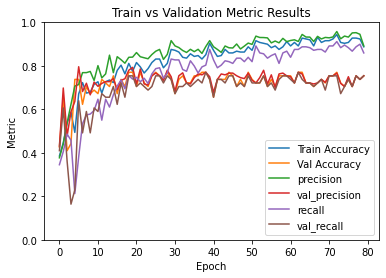

In [16]:
plt.plot(history16.history['accuracy'], label='Train Accuracy')
plt.plot(history16.history['val_accuracy'], label = 'Val Accuracy')
plt.plot(history16.history['precision'], label = 'precision')
plt.plot(history16.history['val_precision'], label = 'val_precision')
plt.plot(history16.history['recall'], label = 'recall')
plt.plot(history16.history['val_recall'], label = 'val_recall')
plt.legend() 
plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Train vs Validation Metric Results');

Less overfit than previous models. Valid ccuracy, precision and recall hovering in the 0.7s

In [17]:
model16.evaluate(test_data_aug)

preds16 = model16.predict(test_data_aug) > 0.5

preds16 = preds16.astype(int)

test_data_values = test_data.labels 


6/6 [==============================] - 3s 523ms/step - loss: 2.2815 - accuracy: 0.5370 - recall: 0.5123 - precision: 0.5461


In [18]:

results_df['test_accuracy'].iloc[16] = 0.5370

results_df['test_recall'].iloc[16] = 0.5123

results_df['test_precision'].iloc[16] = 0.5461

/Users/annafunsten/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
cm = confusion_matrix(test_data_values, preds16.argmax(axis=1))
print(pd.DataFrame(cm, index = ['effusion', 'tube', 'normal'], columns = ['effusion', 'tube', 'normal']))
#Confusion Matrix
#Row is True Class 
#Column is Predicted Class 
#Diag Match

          effusion  tube  normal
effusion        27    18      26
tube             8    19       4
normal          12     7      41


In [20]:
print(classification_report(test_data_values, preds16.argmax(axis=1), target_names = ['effusion', 'tube', 'normal']))
#F1 Score is the 2*((precision*recall)/(precision+recall)) 
#TP/(TP+FP)
#TP/(TP+FN)

              precision    recall  f1-score   support

    effusion       0.57      0.38      0.46        71
        tube       0.43      0.61      0.51        31
      normal       0.58      0.68      0.63        60

    accuracy                           0.54       162
   macro avg       0.53      0.56      0.53       162
weighted avg       0.55      0.54      0.53       162



## Model 16: Freezing Inception-ResNetV2

In [226]:
#train_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'training')

#valid_aug = train_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/train/', subset = 'validation' )

Found 249 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


In [227]:
#reference https://www.youtube.com/watch?v=3ou0KYtDlOI

In [228]:
conv_base18 = InceptionResNetV2(include_top=False, input_shape = (299, 299, 3))

In [229]:
#type(conv_base18)

tensorflow.python.keras.engine.functional.Functional

In [230]:
#conv_base18.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 149, 149, 32) 96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_98[0][0]     
________________________________________________________________________________

In [231]:
#model18 = Sequential()
#for layer in conv_base18.layers[0]:
    #model18.add(Flatten())
   # model18.add(layer)

#for layers in model18.layers:
    #layer.trainable = False 

TypeError: 'InputLayer' object is not iterable

In [ ]:
#model18.add(GlobalAveragePooling2D(input_shape = 150, 150, 3 =))

#model18.add(Dense(50, activation = 'relu'))

#model18.add(Dense(units = 3, activation = 'softmax'))

#model18.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


#history = model18.fit(train_aug, epochs = 80, validation_data = valid_aug,
 #   batch_size = 32, callbacks=[early_stop])

#plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
#plt.legend() 
#plt.yticks([0,0.2,0.4,0.6, 0.8,1]) 
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.title('Results');

### Export Model Summary DF

In [306]:
results_df.info()

results_df = results_df.apply(pd.to_numeric)


<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, baseline to model_20
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   train_accuracy   16 non-null     object
 1   val_accuracy     16 non-null     object
 2   test_accuracy    16 non-null     object
 3   train_precision  16 non-null     object
 4   val_precision    16 non-null     object
 5   test_precision   16 non-null     object
 6   train_recall     16 non-null     object
 7   val_recall       16 non-null     object
 8   test_recall      16 non-null     object
dtypes: object(9)
memory usage: 1.6+ KB


In [22]:
results_df.describe()

,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.921341,0.668265,0.399535,0.936741,0.682094,0.411359,0.900065,0.641265,0.385741
std,0.093372,0.138212,0.239350,0.076117,0.137091,0.248733,0.118612,0.139464,0.231936
min,0.714900,0.426200,0.000000,0.770600,0.438600,0.000000,0.658600,0.409800,0.000000
25%,0.887600,0.639300,0.413600,0.891700,0.672100,0.408800,0.827300,0.573800,0.345700
50%,0.943800,0.704900,0.450600,0.962600,0.737700,0.454500,0.939800,0.639300,0.450600
75%,1.000000,0.754100,0.555600,1.000000,0.766000,0.597500,1.000000,0.754100,0.555600
max,1.000000,0.836100,0.666700,1.000000,0.836100,0.675300,1.000000,0.836100,0.642000


In [21]:
results_df[:17]

,Unnamed: 0,train_accuracy,val_accuracy,test_accuracy,train_precision,val_precision,test_precision,train_recall,val_recall,test_recall
0,baseline,1.0000,0.7377,0.4506,1.0000,0.7377,0.4506,1.0000,0.7377,0.4506
1,model_1,1.0000,0.6721,0.4403,1.0000,0.6721,0.4403,1.0000,0.6721,0.4403
2,model_2,1.0000,0.7541,0.4938,1.0000,0.7500,0.5000,1.0000,0.7377,0.4938
3,model_3,0.9116,0.6393,0.4506,0.9190,0.6842,0.4472,0.9116,0.6393,0.4444
4,model_4,0.8956,0.6885,0.4321,0.9626,0.7358,0.4545,0.8273,0.6393,0.4321
5,model_5,0.8153,0.7541,0.4136,0.8710,0.7647,0.4088,0.7590,0.6393,0.3457
6,model_6,1.0000,0.8033,0.5864,1.0000,0.8033,0.5975,1.0000,0.8033,0.5864
7,model_7,1.0000,0.7869,0.5556,1.0000,0.7869,0.5590,1.0000,0.7869,0.5556
8,model_8,0.9880,0.4590,0.0000,0.9880,0.4590,0.0000,0.9880,0.4590,0.0000
9,model_9,1.0000,0.4262,0.0000,1.0000,0.4464,0.0000,1.0000,0.4098,0.0000


#### Best Model to Data: Model 12
test_accuracy max: 0.666700

test_precision max: 0.675300

test_recall max: 0.642000

In [312]:
results_df.to_csv('../data/results_df.csv')

## Exploring Individual Image Predictions 

In [27]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


test_data = test_gen_aug.flow_from_directory('/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/')

preds = model12.predict(test_data) >.5

#np.argmax(preds.astype(int), axis = 0)

#test_data_values = test_data.labels 

#test_data_values

#x_test_binarized = to_categorical(test_data_values)

#model7.evaluate()

path = "/Users/annafunsten/Desktop/dsir-322/capstone/Ear-Infection-Identifier/data/middle_ear_images/test/02_tube_test/AM85R.jpg"

test = image.load_img(path, target_size=(256, 256))
test

model12.predict(np.asarray(test).reshape(1, 256, 256, 3))

Found 162 images belonging to 3 classes.


array([[0., 1., 0.]], dtype=float32)